In [5]:
from read_file import *

In [17]:
#import lib
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [7]:
data = radar.fields['reflectivity']['data']  # Assuming 'reflectivity' is the field you're interested in
lon = radar.gate_longitude['data']
lat = radar.gate_latitude['data']
altitude = radar.gate_altitude['data']

In [15]:
# Set up a regular grid of interpolated data points
lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
lon_grid, lat_grid = np.meshgrid(np.linspace(lon_min, lon_max, 100), np.linspace(lat_min, lat_max, 100))


/opt/miniconda3/envs/pyart_env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


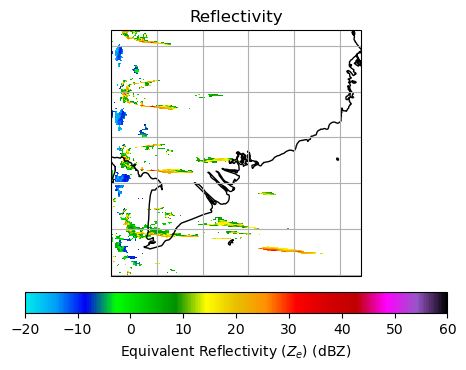

In [18]:
#plot 

# Assume you already have lon, lat, và data đã trích xuất từ radar

fig = plt.figure(figsize=(12, 4))

# Create subplot with PlateCarree projection
ax = plt.subplot(121, projection=ccrs.PlateCarree())

# Plotting the data
img = ax.imshow(data, origin='lower', extent=(lon_min, lon_max, lat_min, lat_max),
                cmap='pyart_NWSRef', vmin=-20, vmax=60)

# Adding colorbar
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label("Equivalent Reflectivity ($Z_e$) (dBZ)")

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()

# Set title
ax.set_title("Reflectivity")

plt.show()